In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exploratory data analysis

In [3]:
data.shape

(8124, 23)

##### This dataset has 8124 instances with 23 features that are characteristics of mushroom like cap shape, colour etc.

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


##### This shows the number of unique categories for each feature and the most ferquently occuring one among them.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

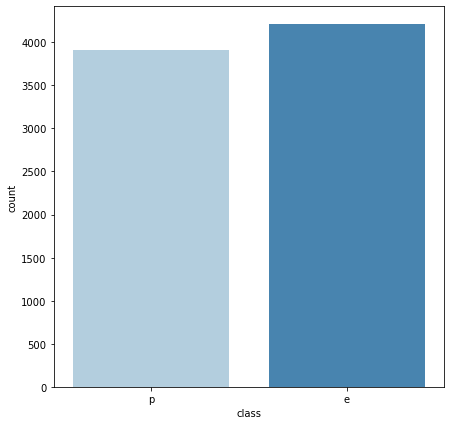

In [7]:
plt.figure(figsize=(7,7))
sns.countplot(x='class',data=data,palette='Blues')

##### There are two unique values in our target column where 'e' stands for edible and 'p' stands for poisonous mushrooms. There are 4208 instances of edible mushrooms and 3916 instances of poisonous ones. So the dataset is balanced.

### Pre-processing

In [8]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
data[data.duplicated()==True].shape

(0, 23)

##### * There are no null values in the data.
##### * There are no duplicate entries.

##### All features are categorical in nature. So encoding needs to be done.

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder=LabelEncoder()

Creating a new dataframe with encoded values for the categories in the features.

In [12]:
new_data=pd.DataFrame()
for i in data.columns:
    new_data[i]=encoder.fit_transform(data[i])

In [13]:
new_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
new_data['veil-type'].unique()

array([0])

##### The feature 'veil type' has a single category and thus doesnot contribute anything to the model. So it can be dropped.

In [15]:
new_data.drop('veil-type',inplace=True,axis=1)

<AxesSubplot:>

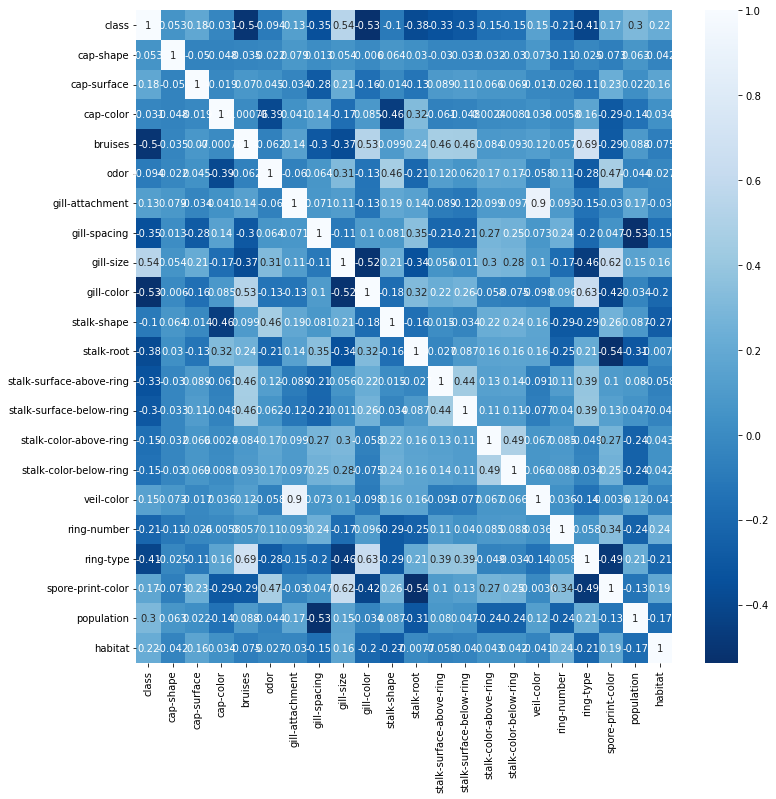

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(new_data.corr(),annot=True,cmap='Blues_r')

### Preparing data for model building

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x=new_data.drop('class',axis=1)
y=new_data['class']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [20]:
print('Number of instances in training data:',x_train.shape[0])
print('Number of instances in test data:',x_test.shape[0])

Number of instances in training data: 6499
Number of instances in test data: 1625


### Modelling

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

##### Logistic regression model

In [23]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)
lg_pred=lg_model.predict(x_test)

print('Training accuracy of the model:',accuracy_score(y_test,lg_pred)*100,'\n')
print('Testing accuracy of the model:',accuracy_score(y_test,lg_pred)*100,'\n')
print('Classification report:\n',classification_report(y_test,lg_pred),'\n')
print(confusion_matrix(y_test,lg_pred))

Training accuracy of the model: 95.13846153846154 

Testing accuracy of the model: 95.13846153846154 

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       863
           1       0.95      0.94      0.95       762

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625
 

[[826  37]
 [ 42 720]]


C:\Users\sofia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Decision tree classifier

In [24]:
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
tree_pred=tree_model.predict(x_test)

print('Training accuracy of the model:',accuracy_score(y_test,tree_pred)*100,'\n')
print('Testing accuracy of the model:',accuracy_score(y_test,tree_pred)*100,'\n')
print('Classification report:\n',classification_report(y_test,tree_pred),'\n')
print(confusion_matrix(y_test,tree_pred))

Training accuracy of the model: 100.0 

Testing accuracy of the model: 100.0 

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 

[[863   0]
 [  0 762]]


##### K Nearest neighbours classifier

In [25]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_pred=knn_model.predict(x_test)

print('Training accuracy of the model:',accuracy_score(y_test,knn_pred)*100,'\n')
print('Testing accuracy of the model:',accuracy_score(y_test,knn_pred)*100,'\n')
print('Classification report:\n',classification_report(y_test,knn_pred),'\n')
print(confusion_matrix(y_test,knn_pred))

Training accuracy of the model: 99.93846153846154 

Testing accuracy of the model: 99.93846153846154 

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 

[[863   0]
 [  1 761]]


##### SVM model

In [26]:
svm_model=SVC()
svm_model.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)

print('Training accuracy of the model:',accuracy_score(y_test,svm_pred)*100,'\n')
print('Testing accuracy of the model:',accuracy_score(y_test,svm_pred)*100,'\n')
print('Classification report:\n',classification_report(y_test,svm_pred),'\n')
print(confusion_matrix(y_test,svm_pred))

Training accuracy of the model: 98.52307692307693 

Testing accuracy of the model: 98.52307692307693 

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       863
           1       1.00      0.97      0.98       762

    accuracy                           0.99      1625
   macro avg       0.99      0.98      0.99      1625
weighted avg       0.99      0.99      0.99      1625
 

[[863   0]
 [ 24 738]]


##### Random forest classifier 

In [27]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)

print('Training accuracy of the model:',accuracy_score(y_test,rf_pred)*100,'\n')
print('Testing accuracy of the model:',accuracy_score(y_test,rf_pred)*100,'\n')
print('Classification report:\n',classification_report(y_test,rf_pred),'\n')
print(confusion_matrix(y_test,rf_pred))

Training accuracy of the model: 100.0 

Testing accuracy of the model: 100.0 

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 

[[863   0]
 [  0 762]]


##### Gaussian model

In [28]:
gaussian_model=GaussianNB()
gaussian_model.fit(x_train,y_train)
gaussian_pred=gaussian_model.predict(x_test)

print('Training accuracy of the model:',accuracy_score(y_test,gaussian_pred)*100,'\n')
print('Testing accuracy of the model:',accuracy_score(y_test,gaussian_pred)*100,'\n')
print('Classification report:\n',classification_report(y_test,gaussian_pred),'\n')
print(confusion_matrix(y_test,gaussian_pred))

Training accuracy of the model: 90.64615384615384 

Testing accuracy of the model: 90.64615384615384 

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       863
           1       0.90      0.90      0.90       762

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625
 

[[786  77]
 [ 75 687]]


##### Bernoulli model

In [29]:
bernoulli_model=DecisionTreeClassifier()
bernoulli_model.fit(x_train,y_train)
bernoulli_pred=bernoulli_model.predict(x_test)

print('Training accuracy of the model:',accuracy_score(y_test,bernoulli_pred)*100,'\n')
print('Testing accuracy of the model:',accuracy_score(y_test,bernoulli_pred)*100,'\n')
print('Classification report:\n',classification_report(y_test,bernoulli_pred),'\n')
print(confusion_matrix(y_test,bernoulli_pred))

Training accuracy of the model: 100.0 

Testing accuracy of the model: 100.0 

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 

[[863   0]
 [  0 762]]


### Conclusion

##### All the classification models tried showed good testing accuracy (all greater than 95%) with decision tree classifier, random forest classifier and bernoulli model with 100% accuracy.